#ElecticityGasUtilitiesPredictor


In this model we will use RNN Model to predict the Electricity Gas Utilites.

In [ ]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [ ]:
df = pd.read_csv('/content/Energy_Production.csv', index_col=0,parse_dates=True)

In [ ]:
df.head()

,IPG2211A2N
DATE,
1992-01-01,85.5560
1992-02-01,80.4178
1992-03-01,74.7390
1992-04-01,69.8367
1992-05-01,67.3781


In [ ]:
len(df)

325

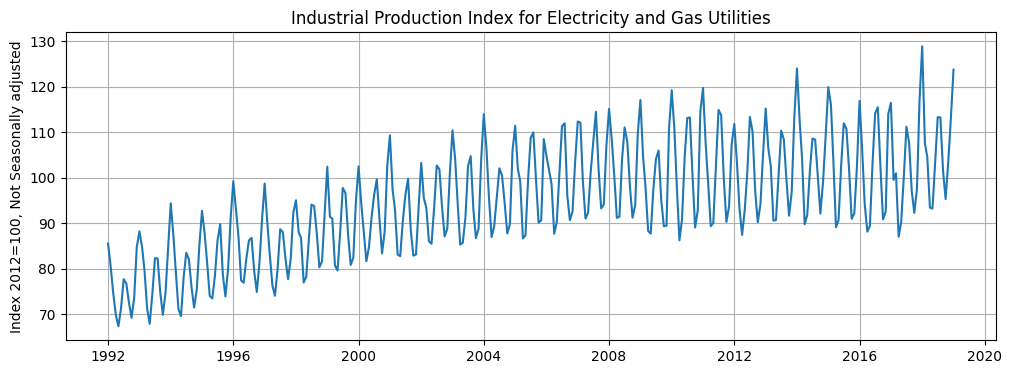

In [ ]:
plt.figure(figsize=(12,4))
plt.title("Industrial Production Index for Electricity and Gas Utilities")
plt.ylabel("Index 2012=100, Not Seasonally adjusted")
plt.grid(True)
# plt.autoscale(axis='x', tight=True)
plt.plot(df['IPG2211A2N'])
plt.show()

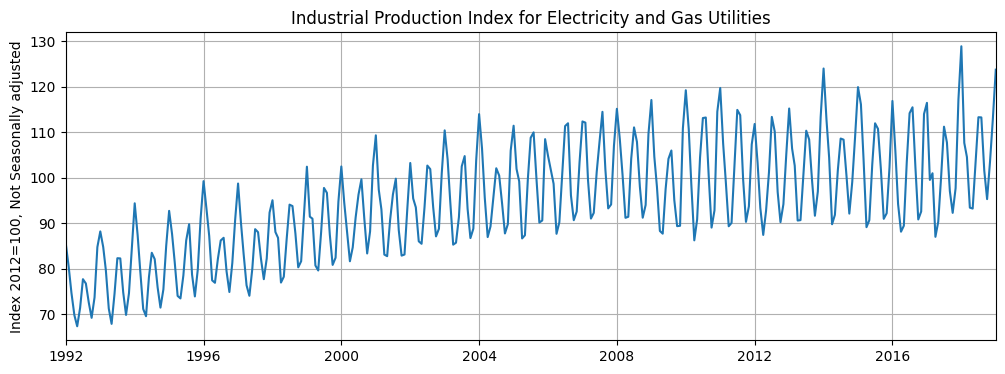

In [ ]:
plt.figure(figsize=(12,4))
plt.title("Industrial Production Index for Electricity and Gas Utilities")
plt.ylabel("Index 2012=100, Not Seasonally adjusted")
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(df['IPG2211A2N'])
plt.show()

In [ ]:
y = df['IPG2211A2N'].values.astype(float)

test_size = 12
window_size = 12

train_set = y[:-test_size]
test_set = y[-test_size:]

In [ ]:
print(f'Train {len(train_set)}')
print(f'Test {len(test_set)}')

Train 313
Test 12


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [ ]:
train_shape = train_set.reshape(-1,1)
print(type(train_set))

print(train_shape.shape)
print(train_set.shape)

<class 'numpy.ndarray'>
(313, 1)
(313,)


In [ ]:
scaler.fit(train_set.reshape(-1,1))

MinMaxScaler(feature_range=(-1, 1))

In [ ]:
train_norm = scaler.transform(train_set.reshape(-1,1))

In [ ]:
train_norm

array([[-0.4091274 ],
       [-0.57614458],
       [-0.76073396],
       [-0.92008321],
       [-1.        ],
       [-0.8686278 ],
       [-0.66363178],
       [-0.69442052],
       [-0.83129906],
       [-0.93959921],
       [-0.79393782],
       [-0.43429277],
       [-0.3222513 ],
       [-0.43396447],
       [-0.59985048],
       [-0.87339303],
       [-0.98267484],
       [-0.76686766],
       [-0.51377399],
       [-0.51526922],
       [-0.75770125],
       [-0.91881227],
       [-0.76434852],
       [-0.4445286 ],
       [-0.12159795],
       [-0.34901591],
       [-0.60678704],
       [-0.87636399],
       [-0.92799168],
       [-0.64827317],
       [-0.47502479],
       [-0.52042126],
       [-0.72240732],
       [-0.86666125],
       [-0.73679728],
       [-0.4246908 ],
       [-0.17557249],
       [-0.34050935],
       [-0.54030132],
       [-0.78326968],
       [-0.8009979 ],
       [-0.63684767],
       [-0.38681272],
       [-0.27097141],
       [-0.63054495],
       [-0

In [ ]:
train_norm = torch.FloatTensor(train_norm).view(-1)

In [ ]:
train_norm

tensor([-0.4091, -0.5761, -0.7607, -0.9201, -1.0000, -0.8686, -0.6636, -0.6944,
        -0.8313, -0.9396, -0.7939, -0.4343, -0.3223, -0.4340, -0.5999, -0.8734,
        -0.9827, -0.7669, -0.5138, -0.5153, -0.7577, -0.9188, -0.7643, -0.4445,
        -0.1216, -0.3490, -0.6068, -0.8764, -0.9280, -0.6483, -0.4750, -0.5204,
        -0.7224, -0.8667, -0.7368, -0.4247, -0.1756, -0.3405, -0.5403, -0.7833,
        -0.8010, -0.6368, -0.3868, -0.2710, -0.6305, -0.7869, -0.5933, -0.2291,
         0.0366, -0.1617, -0.3554, -0.6719, -0.6894, -0.5184, -0.3872, -0.3679,
        -0.6078, -0.7551, -0.5475, -0.2402,  0.0197, -0.2631, -0.4835, -0.7074,
        -0.7822, -0.5893, -0.3064, -0.3281, -0.5189, -0.6636, -0.5156, -0.1879,
        -0.0999, -0.3270, -0.3683, -0.6878, -0.6461, -0.3715, -0.1312, -0.1413,
        -0.3365, -0.5790, -0.5353, -0.2011,  0.1399, -0.2170, -0.2314, -0.5654,
        -0.6015, -0.3258, -0.0119, -0.0468, -0.3463, -0.5616, -0.5104, -0.1095,
         0.1415, -0.1177, -0.3184, -0.53

In [ ]:
print(f'First item, orginal : {train_set[0]}')
print(f'First item, Scaled: {train_norm[0]}')

First item, orginal : 85.556
First item, Scaled: -0.409127414226532


In [ ]:
def input_data(seq, ws):
  out = []
  L = len(seq)

  for i in range(L-ws):
    window = seq[i: i+ws]
    label = seq[i+ws: i+ws+1]
    out.append((window, label))

  return out

In [ ]:
train_data = input_data(train_norm, window_size)

In [ ]:
print(train_data[0])
print(type(train_data[0][0]))

(tensor([-0.4091, -0.5761, -0.7607, -0.9201, -1.0000, -0.8686, -0.6636, -0.6944,
        -0.8313, -0.9396, -0.7939, -0.4343]), tensor([-0.3223]))
<class 'torch.Tensor'>


In [ ]:
len(train_data)

301

In [ ]:
class LSTMnetwork(nn.Module):

  def __init__(self, input_size=1, hidden_size=64, out_size=1):
    super().__init__()
    self.hidden_size = hidden_size
    self.lstm = nn.LSTM(1, hidden_size)
    self.linear = nn.Linear(hidden_size, 1)
    self.hidden = (torch.zeros(1,1,hidden_size), torch.zeros(1,1,hidden_size))


  def forward(self, seq):
    lstm_out , self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden) #outputshape (len(seq), 1, 64)
    pred = self.linear(lstm_out.view(len(seq),-1))  #here view changes the shape into(len(seq), 64)
    return pred[-1]


In [ ]:
torch.manual_seed(101)
model = LSTMnetwork()
model

LSTMnetwork(
  (lstm): LSTM(1, 64)
  (linear): Linear(in_features=64, out_features=1, bias=True)
)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 50

for i in range(epochs):

  for seq , y in train_data:

   optimizer.zero_grad()

   model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))

   y_pred = model(seq)

   loss = criterion(y_pred, y)

   loss.backward()

   optimizer.step()

  print(f'Epoch {i} loss {loss.item()}')



Epoch 0 loss 0.7314829230308533
Epoch 1 loss 0.3222446143627167
Epoch 2 loss 0.24065648019313812
Epoch 3 loss 0.22756004333496094
Epoch 4 loss 0.2115359902381897
Epoch 5 loss 0.1990658938884735
Epoch 6 loss 0.19067460298538208
Epoch 7 loss 0.18480713665485382
Epoch 8 loss 0.1796238124370575
Epoch 9 loss 0.174419566988945
Epoch 10 loss 0.16898852586746216
Epoch 11 loss 0.16325677931308746
Epoch 12 loss 0.1573283076286316
Epoch 13 loss 0.15139399468898773
Epoch 14 loss 0.14566247165203094
Epoch 15 loss 0.14030809700489044
Epoch 16 loss 0.13544116914272308
Epoch 17 loss 0.13110320270061493
Epoch 18 loss 0.12727928161621094
Epoch 19 loss 0.12391788512468338
Epoch 20 loss 0.12095382064580917
Epoch 21 loss 0.1183256134390831
Epoch 22 loss 0.11598335951566696
Epoch 23 loss 0.11389026045799255
Epoch 24 loss 0.11202085018157959
Epoch 25 loss 0.11036166548728943
Epoch 26 loss 0.10891446471214294
Epoch 27 loss 0.10769789665937424
Epoch 28 loss 0.1067442074418068
Epoch 29 loss 0.10608401149511337


In [ ]:
future = 12
preds = train_norm[-window_size:].tolist()


model.eval()

for i in range(future):
  seq = torch.FloatTensor(preds[-window_size:])

  with torch.no_grad():

    model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))

    preds.append(model(seq).item())



In [ ]:
preds[12:]

[0.25402793288230896,
 -0.0027752164751291275,
 -0.34294819831848145,
 -0.21167579293251038,
 0.23918864130973816,
 0.48914822936058044,
 0.2470800131559372,
 -0.08662212640047073,
 -0.25781774520874023,
 0.0225857961922884,
 0.5441879034042358,
 0.6110796928405762]

In [ ]:
true_predections = scaler.inverse_transform(np.array(preds[12:]).reshape(-1,1))

In [ ]:
true_predections

array([[105.95764234],
       [ 98.05722185],
       [ 87.59197015],
       [ 91.63050007],
       [105.50111896],
       [113.1910007 ],
       [105.74389306],
       [ 95.47771359],
       [ 90.21096598],
       [ 98.83744073],
       [114.88426875],
       [116.94216121]])

In [ ]:
df['IPG2211A2N'][-12:]

,IPG2211A2N
DATE,
2018-02-01,107.6711
2018-03-01,104.5716
2018-04-01,93.4491
2018-05-01,93.2405
2018-06-01,103.3083
2018-07-01,113.3178
2018-08-01,113.2758
2018-09-01,101.5656
2018-10-01,95.3203


In [ ]:
x = np.arange('2018-02-01','2019-02-01',dtype='datetime64[M]')

In [ ]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

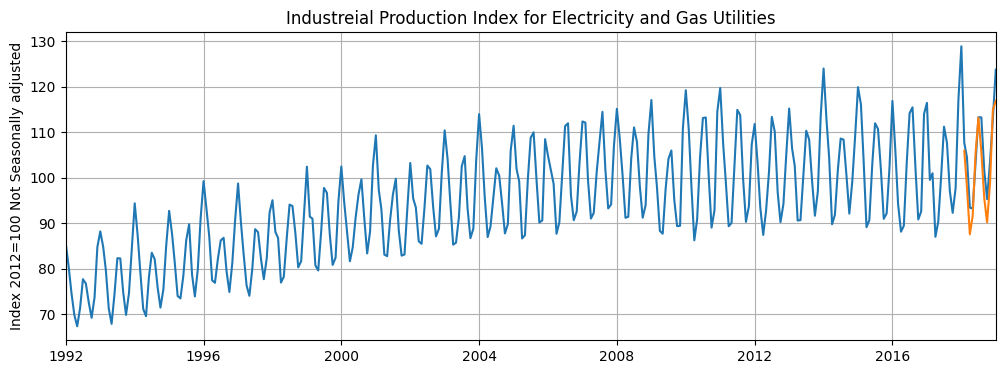

In [ ]:
plt.figure(figsize=(12,4))
plt.title('Industreial Production Index for Electricity and Gas Utilities')
plt.ylabel('Index 2012=100 Not Seasonally adjusted')
plt.autoscale(axis='x', tight=True)
plt.grid(True)
plt.plot(df['IPG2211A2N'])
plt.plot(x, true_predections)
plt.show()

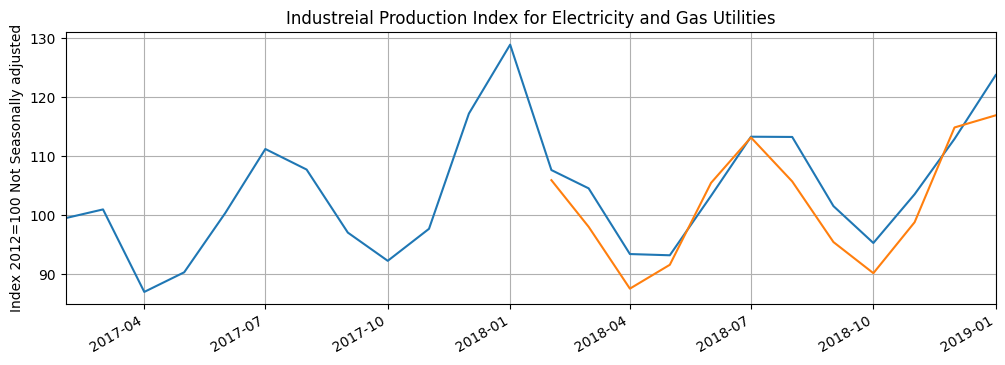

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.title('Industreial Production Index for Electricity and Gas Utilities')
plt.ylabel('Index 2012=100 Not Seasonally adjusted')
plt.autoscale(axis='x', tight=True)
plt.grid(True)
fig.autofmt_xdate()
plt.plot(df['IPG2211A2N']['2017-02-01':])
plt.plot(x, true_predections)
plt.show()